### Image Credits : https://jooinn.com/cameraman.html

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from IPython.display import Image
import cv2
from scipy import ndimage
from google.colab.patches import cv2_imshow

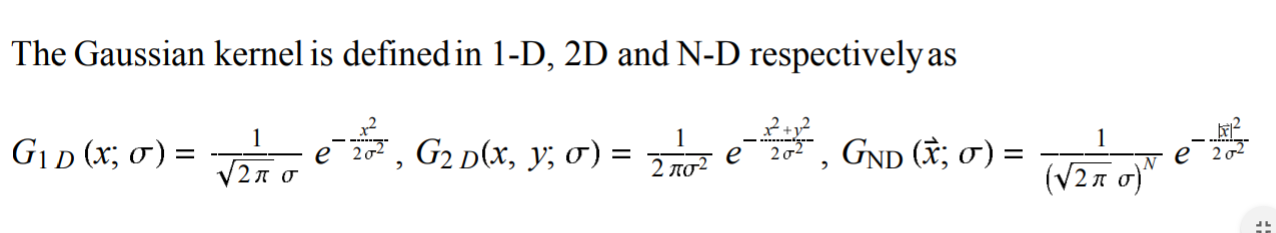

In [0]:
Image('gaussian_formula.PNG')

### Read and Resize Image



Previous Dimensions:
 (2344, 2813)
Resized Dimensions:
  (351, 421)


Original Gray Scale Image


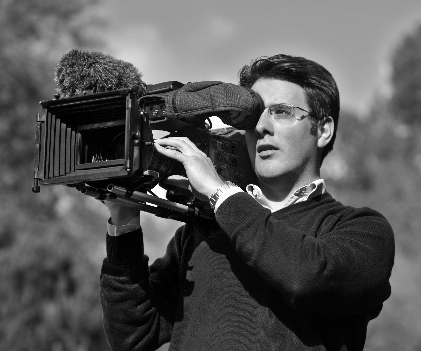

In [0]:
img = cv2.imread('cameraman.jpg',   0)
scale_percent = 15 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim)
print('Previous Dimensions:\n',img.shape)
print('Resized Dimensions:\n ',resized.shape)
print('\n') 
print('Original Gray Scale Image')
cv2_imshow(resized)

### Function to create 2D Gaussian Kernel

In [0]:
def gauss_filter(filter_size = 5, sigma = 1):
    """Returns a 2D Gaussian kernel."""
    m = filter_size
    n = filter_size
    
    x = np.linspace(-((m-1)/2),((m-1)/2), num= m)
    y = np.linspace( -((n-1)/2),((n-1)/2), num = n)
    h1, h2 = np.meshgrid(x,y)
    print('Matrix X')
    print(h1)
    print()
    print('Matrix Y')
    print(h2)
    sum_t = 0
    h = np.ones(shape = (m, n))
    for x in range(0,m):
        for y in range(0,n):
            h[x,y] = (1/(2*np.pi* sigma*sigma)) * np.exp(-(h1[x,y]*h1[x,y] + h2[x,y]*h2[x,y])/(2*sigma*sigma))
            sum_t = sum_t + h[x,y] 
            
    temp = np.floor((h/sum_t)*255)
    print()
    print('Normalized and then multiplied by 255 and then took floor for making it discrete gaussian kernel')
    print('Its the discrete',m, 'X', n  , 'Gaussian Kernel')
    print(temp, '\n')
    sum_kernel =sum(sum(temp))
    print('Kernel Sum now:\n')
    print(sum_kernel, '\n')
    print('Again normalized by dividing with',sum_kernel,' kernel sum.', '\n')
    print(temp/sum_kernel, '\n')
    print('Final Kernel Image')
    plt.imshow(temp/sum_kernel, cmap = 'gray')
    return temp/sum_kernel
    #return h/sum_t

## (a) Give an example of a discrete 3x3 and 5x5 Gaussian smoothing kernel.

### 3X3 Kernel

Matrix X
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]

Matrix Y
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]

Normalized and then multiplied by 255 and then took floor for making it discrete gaussian kernel
Its the discrete 3 X 3 Gaussian Kernel
[[19. 31. 19.]
 [31. 52. 31.]
 [19. 31. 19.]] 

Kernel Sum now:

252.0 

Again normalized by dividing with 252.0  kernel sum. 

[[0.07539683 0.12301587 0.07539683]
 [0.12301587 0.20634921 0.12301587]
 [0.07539683 0.12301587 0.07539683]] 

Final Kernel Image


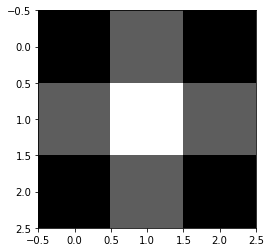

In [4]:
gaussian_kernel_3X3_1 = gauss_filter(filter_size = 3 , sigma = 1)

Image after Gaussian Smoothing


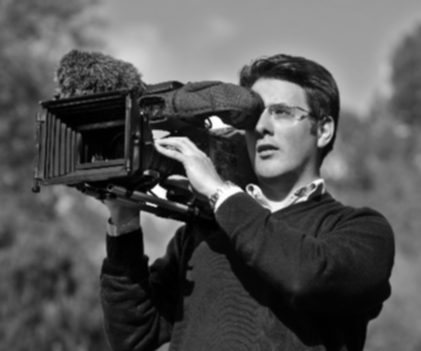

In [0]:
smooth = ndimage.convolve(resized, gaussian_kernel_3X3_1)
print('Image after Gaussian Smoothing')
cv2_imshow(smooth)

5X5 Kernel

Matrix X
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]

Matrix Y
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]

Normalized and then multiplied by 255 and then took floor for making it discrete gaussian kernel
Its the discrete 5 X 5 Gaussian Kernel
[[ 0.  3.  5.  3.  0.]
 [ 3. 15. 25. 15.  3.]
 [ 5. 25. 41. 25.  5.]
 [ 3. 15. 25. 15.  3.]
 [ 0.  3.  5.  3.  0.]] 

Kernel Sum now:

245.0 

Again normalized by dividing with 245.0  kernel sum. 

[[0.         0.0122449  0.02040816 0.0122449  0.        ]
 [0.0122449  0.06122449 0.10204082 0.06122449 0.0122449 ]
 [0.02040816 0.10204082 0.16734694 0.10204082 0.02040816]
 [0.0122449  0.06122449 0.10204082 0.06122449 0.0122449 ]
 [0.         0.0122449  0.02040816 0.0122449  0.        ]] 

Final Kernel Image


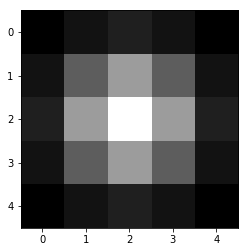

In [0]:
gaussian_kernel_5X5_1 = gauss_filter(filter_size = 5 , sigma = 1)

Image after Gaussian Smoothing


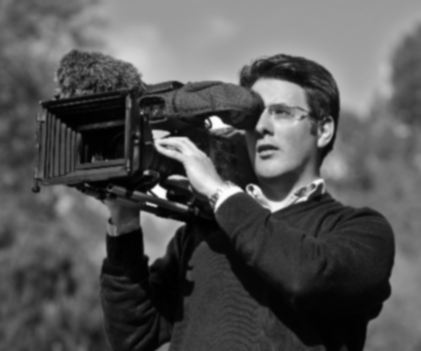

In [0]:
smooth = ndimage.convolve(resized, gaussian_kernel_5X5_1)
print('Image after Gaussian Smoothing')
cv2_imshow(smooth)

## (b) State laplace kernels of size 3x3 and 5x5 which will compute the second derivative of the smoothed image.

## 3X3 Laplacian Filter

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

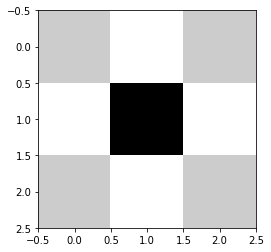

In [0]:
laplacian_kernel_3x3_1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
plt.imshow(laplacian_kernel_3x3_1, cmap = 'gray')
laplacian_kernel_3x3_1

Image after applying laplacian on original image


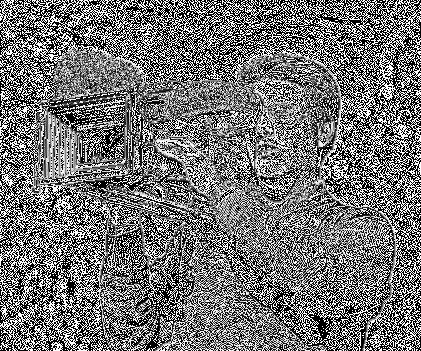


Image after applying laplacian on smoothed image


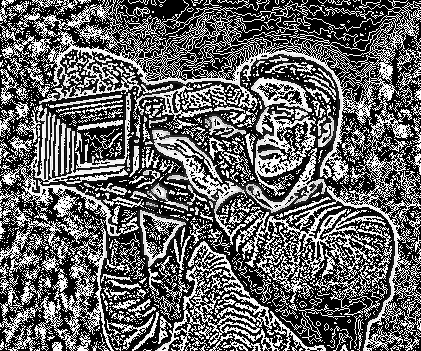

In [0]:
im_without_smoothing = ndimage.convolve(resized, laplacian_kernel_3x3_1)
im_with_smoothing = ndimage.convolve(smooth, laplacian_kernel_3x3_1)
print('Image after applying laplacian on original image')
cv2_imshow(im_without_smoothing)
print('\nImage after applying laplacian on smoothed image')
cv2_imshow(im_with_smoothing)

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

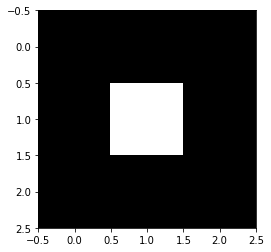

In [0]:
laplacian_kernel_3x3_2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plt.imshow(laplacian_kernel_3x3_2, cmap = 'gray')
laplacian_kernel_3x3_2

Image after applying laplacian on original image


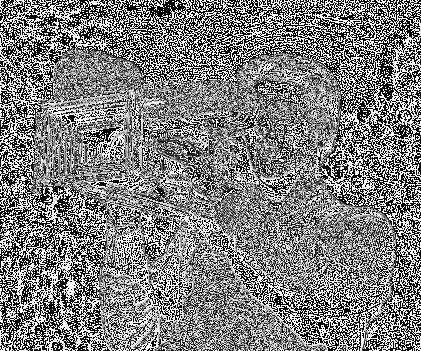


Image after applying laplacian on smoothed image


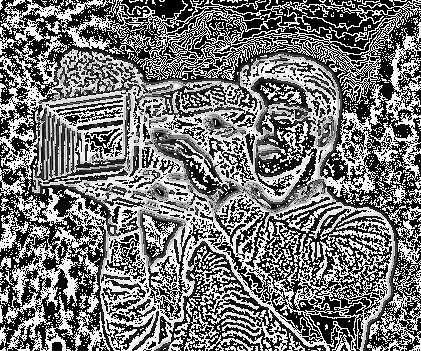

In [0]:
im_without_smoothing = ndimage.convolve(resized, laplacian_kernel_3x3_2)
im_with_smoothing = ndimage.convolve(smooth, laplacian_kernel_3x3_2)
print('Image after applying laplacian on original image')
cv2_imshow(im_without_smoothing)
print('\nImage after applying laplacian on smoothed image')
cv2_imshow(im_with_smoothing)

## 5X5 Laplacian Filter

array([[  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1, -24,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1]])

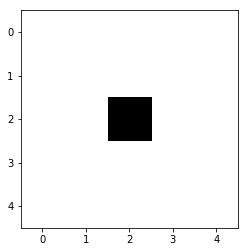

In [0]:
laplacian_kernel_5x5_1 = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,-24,1,1],[1,1,1,1,1],[1,1,1,1,1]])
plt.imshow(laplacian_kernel_5x5_1, cmap = 'gray')
laplacian_kernel_5x5_1

Image after applying laplacian on original image


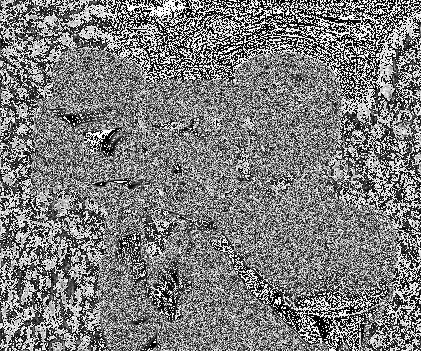


Image after applying laplacian on smoothed image


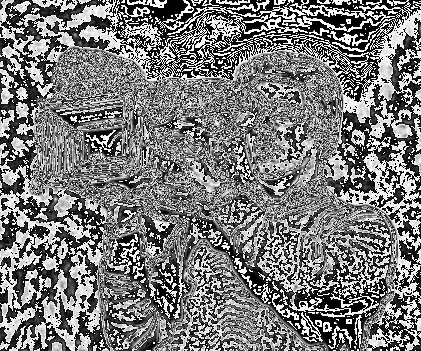

In [0]:
im_without_smoothing = ndimage.convolve(resized, laplacian_kernel_5x5_1)
im_with_smoothing = ndimage.convolve(smooth, laplacian_kernel_5x5_1)
print('Image after applying laplacian on original image')
cv2_imshow(im_without_smoothing)
print('\nImage after applying laplacian on smoothed image')
cv2_imshow(im_with_smoothing)

array([[ 2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [-2,  0,  2,  1,  1],
       [ 0, -2,  1,  0,  0],
       [ 0,  0, -1, -1, -1]])

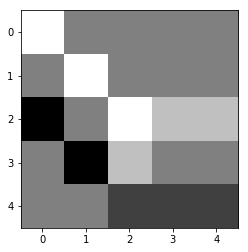

In [0]:
laplacian_kernel_5x5_2 = np.array([[2,0,0,0,0],[0,2,0,0,0],[-2,0,2,1,1],[0,-2,1,0,0],[0,0,-1,-1,-1]])
plt.imshow(laplacian_kernel_5x5_2, cmap = 'gray')
laplacian_kernel_5x5_2

Image after applying laplacian on original image


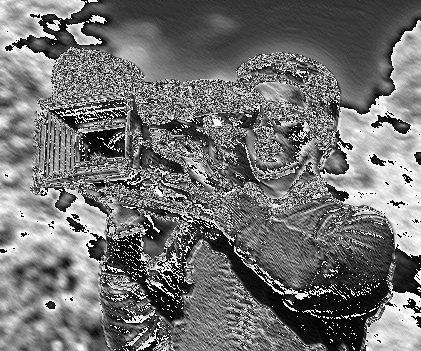


Image after applying laplacian on smoothed image


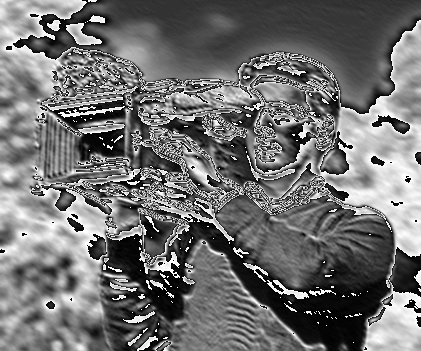

In [0]:
im_without_smoothing = ndimage.convolve(resized, laplacian_kernel_5x5_2)
im_with_smoothing = ndimage.convolve(smooth, laplacian_kernel_5x5_2)
print('Image after applying laplacian on original image')
cv2_imshow(im_without_smoothing)
print('\nImage after applying laplacian on smoothed image')
cv2_imshow(im_with_smoothing)

array([[ 4,  1,  0,  0,  0],
       [ 0,  4,  1,  0,  0],
       [-4,  0,  5,  3,  3],
       [-1, -4,  2,  0,  0],
       [ 0, -1, -2, -3, -3]])

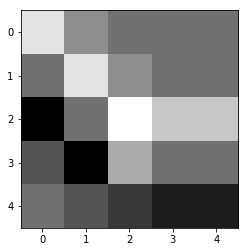

In [0]:
laplacian_kernel_5x5_3 = np.array([[4,1,0,0,0],[0,4,1,0,0],[-4,0,5,3,3],[-1,-4,2,0,0],[0,-1,-2,-3,-3]])
plt.imshow(laplacian_kernel_5x5_3, cmap = 'gray')
laplacian_kernel_5x5_3

Image after applying laplacian on original image


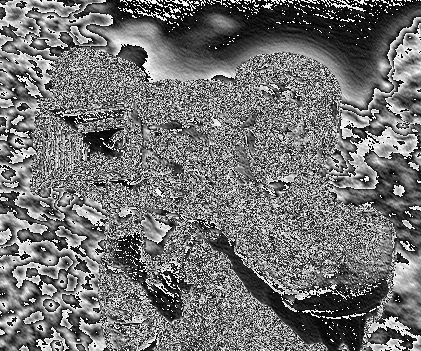


Image after applying laplacian on smoothed image


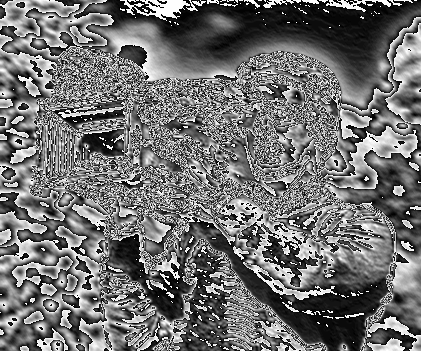

In [0]:
im_without_smoothing = ndimage.convolve(resized, laplacian_kernel_5x5_3)
im_with_smoothing = ndimage.convolve(smooth, laplacian_kernel_5x5_3)
print('Image after applying laplacian on original image')
cv2_imshow(im_without_smoothing)
print('\nImage after applying laplacian on smoothed image')
cv2_imshow(im_with_smoothing)

## Combining Gaussian and Laplacian Filters by Convolution and then directly applying it to image Since convolution operation is associative

## (c) We can combine the above kernels (Gaussian and Lapalce) to getwhat is called the Laplacian of Gaussian (LoG) kernel (∇2G) ∗ I.So that just by one convolution operation we get both smoothing and edge detection done. From the answers to your above two questions compute and state the LoG discrete kernels of size 3x3and 5x5

LOG Filter Values
[[ 0.0952381  -0.01190476  0.0952381 ]
 [-0.01190476 -0.33333333 -0.01190476]
 [ 0.0952381  -0.01190476  0.0952381 ]] 



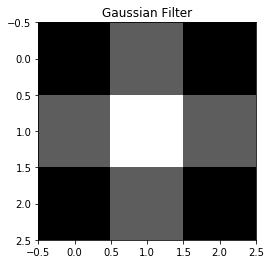

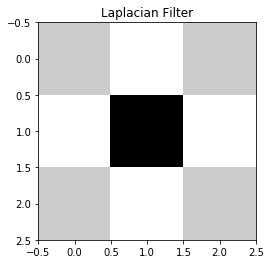

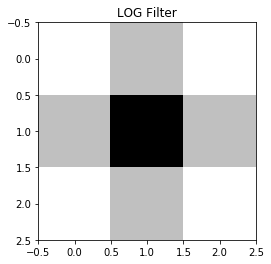

In [0]:
log_filter_3X3_1 = ndimage.convolve(gaussian_kernel_3X3_1,laplacian_kernel_3x3_1) 
print('LOG Filter Values')
print(log_filter_3X3_1, '\n')
plt.title('Gaussian Filter')
plt.imshow(gaussian_kernel_3X3_1, cmap = 'gray')

plt.figure()
plt.title('Laplacian Filter')
plt.imshow(laplacian_kernel_3x3_1, cmap = 'gray')

plt.figure()
plt.title('LOG Filter')
plt.imshow(log_filter_3X3_1, cmap = 'gray')

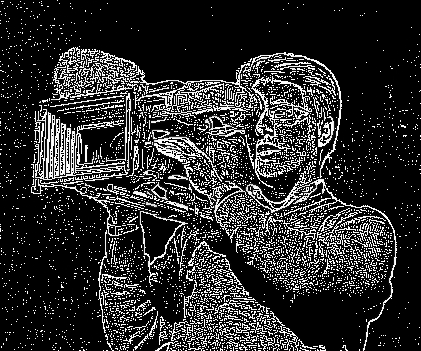

In [0]:
res_3x3 = ndimage.convolve(resized, log_filter_3X3_1)
cv2_imshow(res_3x3)

LOG Filter Values
[[ 1.          0.69387755  0.48979592  0.69387755  1.        ]
 [ 0.69387755 -0.53061224 -1.55102041 -0.53061224  0.69387755]
 [ 0.48979592 -1.55102041 -3.18367347 -1.55102041  0.48979592]
 [ 0.69387755 -0.53061224 -1.55102041 -0.53061224  0.69387755]
 [ 1.          0.69387755  0.48979592  0.69387755  1.        ]]


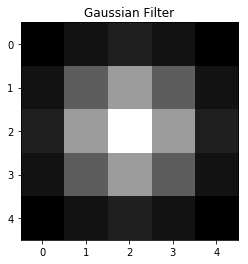

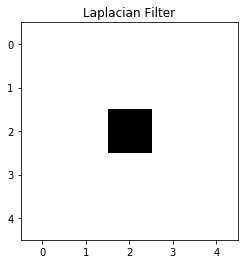

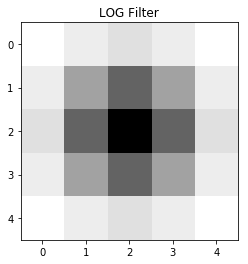

In [0]:
log_filter_5X5_1 = ndimage.convolve(gaussian_kernel_5X5_1,laplacian_kernel_5x5_1) 
print('LOG Filter Values')
print(log_filter_5X5_1)
plt.title('Gaussian Filter')
plt.imshow(gaussian_kernel_5X5_1, cmap = 'gray')
plt.figure()
plt.title('Laplacian Filter')
plt.imshow(laplacian_kernel_5x5_1, cmap = 'gray')
plt.figure()
plt.title('LOG Filter')
plt.imshow(log_filter_5X5_1, cmap = 'gray')

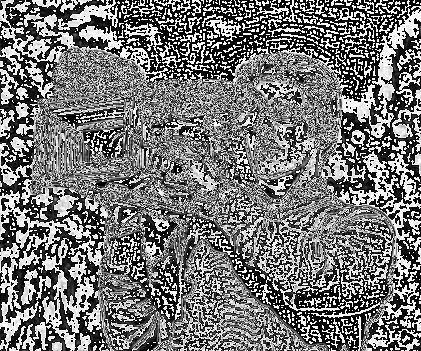

In [0]:
res_5x5 = ndimage.convolve(resized, log_filter_5X5_1)
cv2_imshow(res_5x5)

## (d) Can this 2D convolution be separated into two 1D convolution.State the condition for this discussed in the class and apply to the above LoG kernels. If yes please obtain the corresponding 3x1 and1x3 kernels for size 3x3 and 5x1 and 1x5 kernels for size 5x5

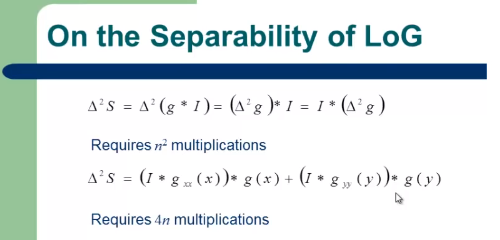

In [28]:
Image('log_separable.PNG')
## Reference : https://www.youtube.com/watch?v=lC-IrZsdTrw&t=464s